# Employee Retention - People Analytics

## Introduction

Employee turn-over is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

This project analyzes a hypothetical dataset with the hopes of determining when employees are going to quit. Understanding why and when employees are most likely to leave can lead to actions to improve employee
retention as well as planning new hiring in advance. 

We'll first clean the data, then explore the data, and finally use the data and build an algorithm to predict and when employees are going to leave by understanding the factors of employee churn.  

The data that we're using includes:
* Employee data from a few companies. 
* We have data about all employees who joined from 01/24/2011 to 12/13/2015. 
* For each employee, we also know if they are still at the company as of 12/13/2015 or if they have quit.
* Beside that, we have general info about the employee, such as avg salarye, dept, and yrs of experience.
* As said above, the goal is to predict employee retention and understand its main drivers.


Specifically, we will do a few things:

1. Assume that the headcount starts from zero on 2011/01/23. 
2. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13.
3. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000.
4. We will create a table with 3 columns: day, employee_headcount, company_id.


Columns in our dataset:
* employee_id : id of the employee. Unique by employee per company
* company_id : company id.
* dept : employee dept
* seniority : number of yrs of work experience when hired
* salary: avg yearly salary of the employee during her employment_length within the company
* join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13
* quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

## Data Preprocessing

We want to clean the data in such a way as to minimize data loss and instead improve our data density.  So instead of removing rows with null values, we can take the mean for instance. Or for categorical variables, we'll create new features out of them in order to be able to use them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
from sklearn.utils import shuffle
from scipy.stats import skew, skewtest
%matplotlib inline
plt.style.use('fivethirtyeight')

//anaconda/envs/kagglehouse/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('../data/employee_retention_data.csv')
df.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN


In [3]:
# df['quitter'] = df[df['quit_date'].isnull()]
df['quitter'] = np.where(df['quit_date'].isnull(), 0, 1)

In [4]:
df.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quitter
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,0


In [5]:
df.describe()

,employee_id,company_id,seniority,salary,quitter
count,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478,0.546919
std,288909.026101,2.700011,8.089520,76058.184573,0.497804
min,36.000000,1.000000,1.000000,17000.000000,0.000000
25%,250133.750000,1.000000,7.000000,79000.000000,0.000000
50%,500793.000000,2.000000,14.000000,123000.000000,1.000000
75%,753137.250000,5.000000,21.000000,187000.000000,1.000000
max,999969.000000,12.000000,99.000000,408000.000000,1.000000


In [6]:
df.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
quitter          int64
dtype: object

In [7]:
import datetime
# d = datetime.date(2011,1,23)
# delta = datetime.timedelta(days=1)
# all_days = []
# while d <= datetime.date(2015,12,13):
#     all_days.append(d.strftime("%Y-%m-%d"))
#     d += delta

In [8]:
df['join_date'] = pd.to_datetime(df['join_date'])

In [9]:
df['quit_date'] = pd.to_datetime(df['quit_date'])

In [10]:
for col in df.columns:
    print('Unique {}: {}'.format(col, df[col].unique().shape[0]))

Unique employee_id: 24702
Unique company_id: 12
Unique dept: 6
Unique seniority: 31
Unique salary: 367
Unique join_date: 995
Unique quit_date: 665
Unique quitter: 2


In [11]:
df.seniority.mean()+(2*df.seniority.std())

30.306842609341032

In [12]:
df = df[df.seniority <= df.seniority.mean()+(2*df.seniority.std())]

In [301]:
# plt.subplots(figsize=(12,10))
# sns.countplot(x='dept',data = df)
# plt.xticks(rotation=45)
# plt.title("No. of Employees By Dept")
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [302]:

# plt.subplots(figsize=(12,10))
# sns.countplot(x='seniority',data = df)
# plt.xticks(rotation=45)
# plt.title("No. of Employees By Seniority")
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [13]:
# mean seniority and salary
df.groupby('dept')[['salary','seniority']].describe()

salary                                                  \
                   count           mean           std      min       25%   
dept                                                                       
customer_service  9180.0   82245.424837  31579.835104  17000.0   63000.0   
data_science      3190.0  206885.893417  78661.805657  44000.0  158000.0   
design            1380.0  137460.869565  52387.154782  30000.0  106000.0   
engineer          4612.0  205531.439722  78055.900373  42000.0  158000.0   
marketing         3166.0  135582.438408  52379.632522  30000.0  104000.0   
sales             3172.0  135912.358134  52336.313990  29000.0  105000.0   

                                               seniority                       \
                       50%       75%       max     count       mean       std   
dept                                                                            
customer_service   83000.0  106000.0  166000.0    9180.0  14.171133  8.045194   
data_science      209000.0  269000.0  398000.0    3190.0  14.189028  8.008560   
design            139000.0  177250.0  245000.0    1380.0  14.197826  8.083098   
engineer          209000.0  265000.0  408000.0    4612.0  14.153946  8.040840   
marketing         138000.0  176000.0  262000.0    3166.0  13.966835  8.103468   
sales             137000.0  176000.0  257000.0    3172.0  13.979823  8.085609   

                                              
                  min  25%   50%   75%   max  
dept                                          
customer_service  1.0  7.0  14.0  21.0  29.0  
data_science      1.0  7.0  14.0  21.0  29.0  
design            1.0  7.0  14.0  21.0  29.0  
engineer          1.0  7.0  14.0  21.0  29.0  
marketing         1.0  7.0  14.0  20.0  29.0  
sales             1.0  7.0  13.0  21.0  29.0

In [304]:
# plt.subplots(figsize=(12,10))
# df.groupby('dept')['salary'].mean().plot(kind='bar',rot=45, title='Mean Salary By Dept')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')
# plt.show()
# plt.subplots(figsize=(12,10))
# df.groupby('dept')['salary'].max().plot(kind='bar',rot=45, title='Max Salary By Dept')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [305]:
# plt.subplots(figsize=(12,10))
# df.groupby('dept')['seniority'].mean().plot(kind='bar',rot=45, title='Mean Seniority By Dept')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

Company Comparison

In [306]:
# plt.subplots(figsize=(12,10))
# df.groupby('company_id')['seniority'].mean().plot(kind='bar',rot=45, title='Mean Seniority By Company')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [307]:
# plt.subplots(figsize=(12,10))
# df.groupby('company_id')['salary'].mean().plot(kind='bar',rot=45, title='Mean Salary By Company')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [308]:
# for dept in df['dept'].unique():    
#     plt.subplots(figsize=(12,10))
#     df[df['dept'] == dept].groupby('company_id')['salary'].mean().plot(kind='bar',rot=45, title='Mean Salary of '+str(dept)+' Department By Company')
#     # Get current axis on current figure
#     ax = plt.gca()

#     # Iterate through the list of axes' patches
#     for p in ax.patches:
#         ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#                 fontsize=12, color='black', ha='center', va='bottom')

In [309]:
# for dept in df['seniority'].unique():    
#     plt.subplots(figsize=(12,10))
#     df[df['seniority'] == dept].groupby('company_id')['salary'].mean().plot(kind='bar',rot=45, title='Mean Salary of '+str(dept)+' year Employees By Company')
#     # Get current axis on current figure
#     ax = plt.gca()

#     # Iterate through the list of axes' patches
#     for p in ax.patches:
#         ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#                 fontsize=12, color='black', ha='center', va='bottom')

In [14]:
df['employment_length'] = (df['quit_date'] - df['join_date'])/ np.timedelta64(1, 'D')

In [288]:
# df.dropna(inplace = True) # Current Employees

In [189]:
# # data.groupby('company_id')['employment_length'].mean().plot(kind='bar')
# plt.subplots(figsize=(12,10))
# df.groupby('company_id')['employment_length'].mean().plot(kind='bar',rot=45, title='Mean Employment Length (Days) by Company')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [190]:
# # data.groupby('company_id')['employment_length'].mean().plot(kind='bar')
# plt.subplots(figsize=(12,10))
# df.groupby('dept')['employment_length'].mean().plot(kind='bar',rot=45, title='Mean Employment Length (Days) by Dept')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [191]:
# salary_range = pd.cut(df['salary'], range(0,400000, 10000))
# plt.subplots(figsize=(12,10))
# df.groupby(salary_range)['employment_length'].median().plot(kind='bar',rot=45, title='Median Employment Length (Days) by Salary Range')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [15]:
df.describe()

,employee_id,company_id,seniority,salary,quitter,employment_length
count,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,13508.000000
mean,501616.624899,3.426802,14.120972,138176.275304,0.546883,613.430560
std,288908.533280,2.699752,8.054137,76056.331953,0.497807,328.610626
min,36.000000,1.000000,1.000000,17000.000000,0.000000,102.000000
25%,250165.250000,1.000000,7.000000,79000.000000,0.000000,361.000000
50%,500793.000000,2.000000,14.000000,123000.000000,1.000000,417.000000
75%,753142.250000,5.000000,21.000000,187000.000000,1.000000,781.000000
max,999969.000000,12.000000,29.000000,408000.000000,1.000000,1726.000000


Change this before comitting

There aren't any apparent trends in department or seniority. But, for comapnies 11 and 12, they have low employment rate and also mid salary range employees quit more than low or high salary employees.

In [16]:
# emp_length_range = pd.cut(df['employment_length'], range(0,1800, 50))
# plt.subplots(figsize=(12,10))

# df.groupby(emp_length_range)['employee_id'].count().plot(kind='line')
# # Get current axis on current figure
# ax = plt.gca()

# # Iterate through the list of axes' patches
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')

In [17]:
df['dept_n'] = pd.factorize(df['dept'])[0]

In [18]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quitter,employment_length,dept_n
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0,NaN,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389.0,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040.0,2


In [19]:

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in range(0,width):
        for y in range(0,height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

In [20]:
# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

/Users/bill_mac/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [22]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quitter,employment_length,dept_n
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0,NaN,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389.0,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040.0,2


In [323]:
# df_copy = df.copy()

In [324]:
# df = df_copy

In [325]:
# df = df.ix[:,df.columns != "dept"]
# df = df.ix[:,df.columns != "company_id"]

# But first, we log transform the target
# df["employment_length"] = np.log1p(df["employment_length"])

In [326]:
# pd.get_dummies() #

In [23]:
df['Join_Year'] = df['join_date'].dt.year
df['Join_Month'] = df['join_date'].dt.month
df['Join_Day'] = df['join_date'].dt.day

In [24]:
df['salary_group'] = ''
df.ix[df['salary'] < 50000.,'salary_group'] = '<50k'
df.ix[(df['salary'] >= 50000.) & (df['salary'] < 150000.),'salary_group'] = '50-150k'
df.ix[(df['salary'] >= 150000.) & (df['salary'] < 250000.),'salary_group'] = '150-250k'
df.ix[df['salary'] >= 250000,'salary_group'] = '>=250k'

df['employment_length_group'] = ''
df.ix[df['employment_length'] < 365.,'employment_length_group'] = '<1y'
df.ix[(df['employment_length'] >= 365.) & (df['employment_length'] < 730.),'employment_length_group'] = '1-2y'
df.ix[(df['employment_length'] >= 730.) & (df['employment_length'] < 1095.),'employment_length_group'] = '2-3y'
df.ix[(df['employment_length'] >= 1095.) & (df['employment_length'] < 1460.),'employment_length_group'] = '3-4y'
df.ix[(df['employment_length'] >= 1460.) & (df['employment_length'] < 1825.),'employment_length_group'] = '4-5y'
df.ix[df['employment_length'] >= 1825,'employment_length_group'] = '>=5y'

df['seniority_group'] = ''
df.ix[df['seniority'] < 5.,'seniority_group'] = '<5y'
df.ix[(df['seniority'] >= 5.) & (df['seniority'] < 10.),'seniority_group'] = '5-10y'
df.ix[(df['seniority'] >= 10.) & (df['seniority'] < 20.),'seniority_group'] = '10-20y'
df.ix[df['seniority'] >= 20,'seniority_group'] = '>=20y'

/anaconda/envs/kagglehouse/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [25]:
# Normalizes the numeric values that are not binary
list_to_normal = ['seniority', 'employment_length', 'salary']
for col in list_to_normal:
    df[col] = df[col].fillna(0)
    df[col] = preprocessing.scale(df[col])

/Users/bill_mac/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [27]:
df.head()
df.dtypes

employee_id                       float64
company_id                          int64
dept                               object
seniority                         float64
salary                            float64
join_date                  datetime64[ns]
quit_date                  datetime64[ns]
quitter                             int64
employment_length                 float64
dept_n                              int64
Join_Year                           int64
Join_Month                          int64
Join_Day                            int64
salary_group                       object
employment_length_group            object
seniority_group                    object
dtype: object

In [29]:
# Creates pseudo-dummy variables for categorical data
# df_dummies = pd.get_dummies(df)
dept = pd.get_dummies(df.set_index('employee_id')['dept']) 
salary_group = pd.get_dummies(df.set_index('employee_id')['salary_group']) 
employment_length_group = pd.get_dummies(df.set_index('employee_id')['employment_length_group'])
seniority_group = pd.get_dummies(df.set_index('employee_id')['seniority_group'])
df = pd.merge(df, dept.reset_index(), on='employee_id')
df = pd.merge(df, salary_group.reset_index(), on='employee_id')
df = pd.merge(df, employment_length_group.reset_index(), on='employee_id')
df = pd.merge(df, seniority_group.reset_index(), on='employee_id')

In [31]:
# df_dummies.columns
df.dtypes

employee_id                       float64
company_id                          int64
dept                               object
seniority                         float64
salary                            float64
join_date                  datetime64[ns]
quit_date                  datetime64[ns]
quitter                             int64
employment_length                 float64
dept_n                              int64
Join_Year                           int64
Join_Month                          int64
Join_Day                            int64
salary_group                       object
employment_length_group            object
seniority_group                    object
customer_service                    uint8
data_science                        uint8
design                              uint8
engineer                            uint8
marketing                           uint8
sales                               uint8
150-250k                            uint8
50-150k                           

In [32]:
df_copy = df.copy()

In [33]:
# df = df_dummies

In [34]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quitter,employment_length,dept_n,...,,1-2y,2-3y,3-4y,4-5y,<1y,10-20y,5-10y,<5y,>=20y
0,13021.0,7,customer_service,1.723252,-0.646590,2014-03-24,2015-10-30,1,0.639393,0,...,0,1,0,0,0,0,0,0,0,1
1,825355.0,7,marketing,0.729954,0.589361,2013-04-29,2014-04-04,1,0.011596,1,...,0,0,0,0,0,1,0,0,0,1
2,927315.0,4,marketing,-0.015020,-0.488809,2014-10-13,NaT,0,-0.859632,1,...,1,0,0,0,0,0,1,0,0,0
3,662910.0,7,customer_service,0.729954,-0.304731,2012-05-14,2013-06-07,1,0.137156,0,...,0,1,0,0,0,0,0,0,0,1
4,256971.0,2,data_science,1.102441,1.812164,2011-10-17,2014-08-22,1,1.805302,2,...,0,0,1,0,0,0,0,0,0,1


In [339]:
# df = df.drop('join_date',axis = 1)

In [47]:
# Either don't dummy employment length and keep employment-length as the scaled column, or take out employment_length
# cols = df.columns.difference(['employee_id','employment_length','dept','quit_date','join_date','dept_n', 'quitter'])

# Either don't dummy employment length and keep employment-length as the scaled column, or take out employment_length
cols = df.columns.difference(['employee_id','employment_length','employment_length_group','salary','salary_group','seniority','seniority_group','dept','quit_date','join_date','dept_n', 'quitter'])


In [48]:
X = df[cols]
y = df.ix[:,df.columns=='quitter']
# y = df.ix[:,df.columns=='employment_length']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [50]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, Perceptron

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return(rmse)

In [51]:
X_train.dtypes

                    uint8
1-2y                uint8
10-20y              uint8
150-250k            uint8
2-3y                uint8
3-4y                uint8
4-5y                uint8
5-10y               uint8
50-150k             uint8
<1y                 uint8
<50k                uint8
<5y                 uint8
>=20y               uint8
>=250k              uint8
Join_Day            int64
Join_Month          int64
Join_Year           int64
company_id          int64
customer_service    uint8
data_science        uint8
design              uint8
engineer            uint8
marketing           uint8
sales               uint8
dtype: object

In [52]:
print X_train.shape
print y_train.shape

(16549, 24)
(16549, 1)


# Classification

In [53]:
# instantiate the model (using the default parameters)
model = LogisticRegression()
# fit the model with data
mdl = model.fit(X_train, y_train)
# predict the response for new observations
logit = model.predict(X_test)

# sklearn output to check that ran on right data split.
len(logit)
print("y-intercept: %r "%model.intercept_[0])
print()
print("model coefficients: %r "%model.coef_)
print()
print("Prediction Accuracy for Logistic Regression: %r "%metrics.accuracy_score(y_test, logit))
print()

y-intercept: 0.010299977418639229 
()
model coefficients: array([[ -1.03716997e+01,   2.99543134e+00,   2.10076097e-02,
          3.69284113e-02,   2.34278404e+00,   1.74025148e+00,
          6.87685294e-01,   6.83710720e-03,   6.15447079e-02,
          2.61584752e+00,  -3.65042071e-03,  -3.26772295e-02,
          1.51324900e-02,  -8.45227210e-02,   1.50214278e-04,
         -1.32450993e-02,   2.05920138e-03,  -1.55634981e-02,
         -1.45845178e-02,   1.97611097e-02,  -9.31401815e-03,
         -4.26379545e-03,   1.60323104e-02,   2.66888866e-03]]) 
()
Prediction Accuracy for Logistic Regression: 1.0 
()


/Users/bill_mac/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# These represent the y-intercept and coefficients for all the variables in the logistic regression.
def model_stats(model = LogisticRegression(), X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test):

    # 10-fold cross-validation for Logistic Regression to find the CV score
    mdl = model.fit(X_train, y_train)
    scores = cross_val_score(mdl, X_train, y_train, cv=10, scoring= 'accuracy')
    print("Mean CV Accuracy for Model: %r "% scores.mean())
    print()
    logit = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, logit)
    print("Confusion Matrix for Model")
    print (confusion)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # histogram of predicted probabilities of people leaving the company 
    plt.hist(y_pred_prob, bins=5)
    plt.xlim(0, 1)
    plt.title('Histogram of Predicted Probabilities')
    plt.xlabel('Predicted Probability of Employee Leaving')
    plt.ylabel('Frequency')
    cm = confusion_matrix(y_test, logit)


    plot_confusion_matrix(cm, title='Model: Confusion Matrix', \
                          labels=['Stayed', 'Left'], cmap=plt.cm.Greens) 
    # Roc_curve for Logistic Regression Model
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # For class 1, find the area under the curve
    FPR[1], TPR[1], _ = roc_curve(y_test, logit)
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # Plot of a ROC curve for class 1 (employee left)
    plt.figure(figsize=[5,5])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0, 1])
    plt.ylim([0, 1.5])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('Model Receiver operating characteristic for employees leaving', fontsize=18)
    plt.legend(loc="upper left")
    plt.show()

In [55]:
y_train

,quitter
870,1
20224,1
5200,1
9990,1
11869,0
14515,0
140,0
3706,1
8686,0
15162,1


Mean CV Accuracy for Model: 1.0 
()
Confusion Matrix for Model
[[3692    0]
 [   0 4459]]


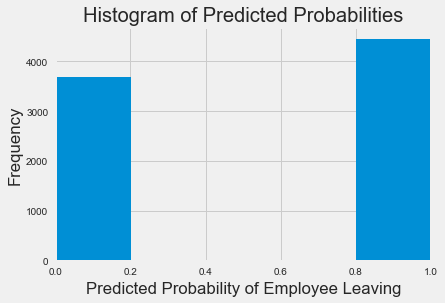

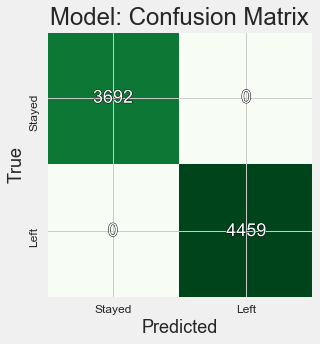

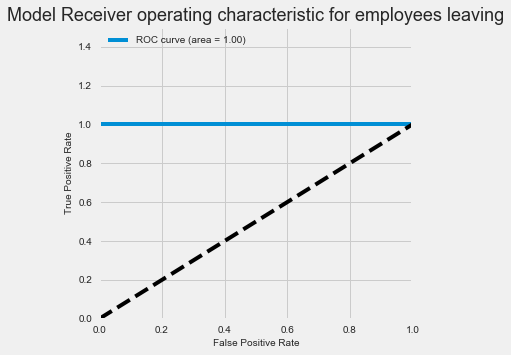

In [56]:
model_stats(model = LogisticRegression(), X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

Mean CV Accuracy for Model: 0.90216934502825696 
()
Confusion Matrix for Model
[[3396  296]
 [ 486 3973]]


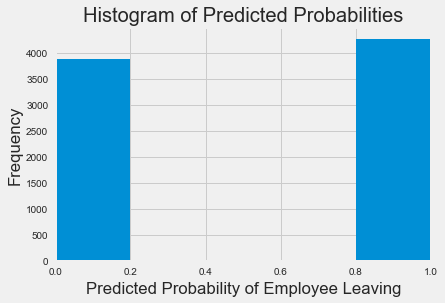

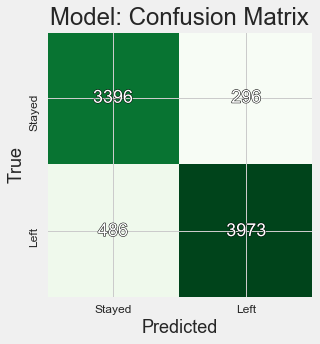

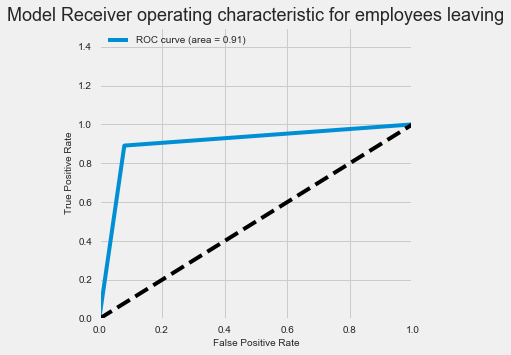

In [58]:
# K-Nearest Neighbours with K=1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
model_stats(model = knn, X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

Mean CV Accuracy for Model: 0.92754837672656598 
()
Confusion Matrix for Model
[[3416  276]
 [ 318 4141]]


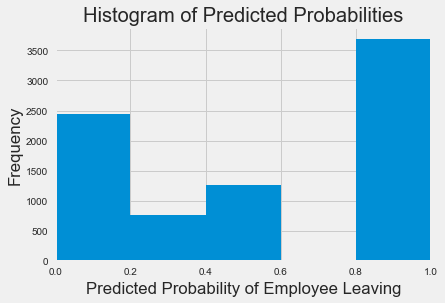

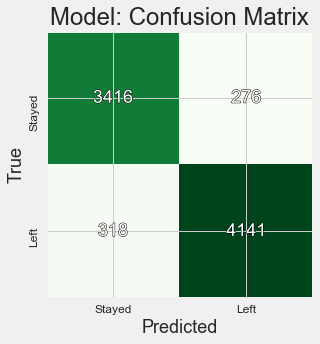

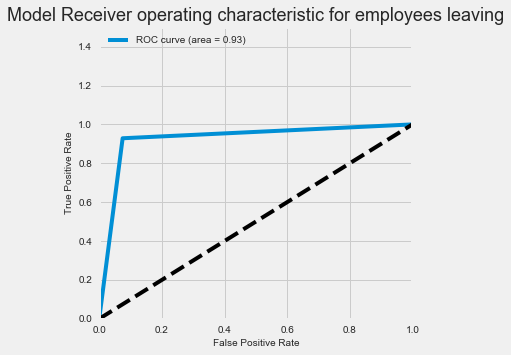

In [61]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
model_stats(model = knn, X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

Mean CV Accuracy for Model: 0.92186850882416338 
()
Confusion Matrix for Model
[[3461  231]
 [ 421 4038]]


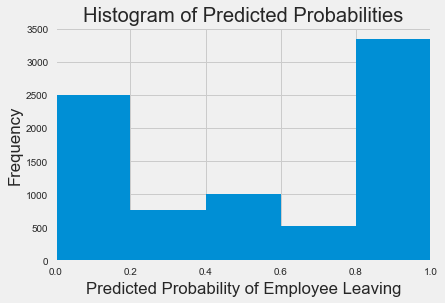

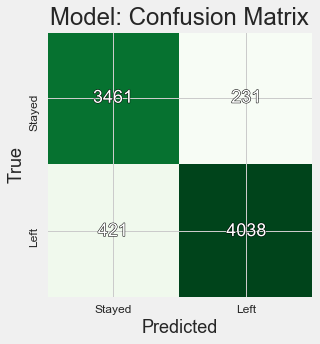

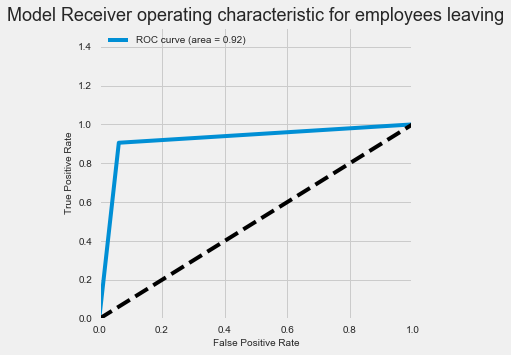

In [62]:
knn = KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')
model_stats(model = knn, X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

In [64]:
from sklearn.grid_search import GridSearchCV

# k_potentials = list(range(1, 200))

# k_potentials = np.linspace(0,200,40)
k_potentials = [int(x.round()) for x in np.linspace(0,200,40)]
k_potentials = k_potentials[1:]
print(k_potentials)
# Set Nearest Neighbours equal to k
knn = KNeighborsClassifier(n_neighbors=k_potentials, metric = 'euclidean')
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_potentials)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train, y_train['quitter'])
# view the results
grid.grid_scores_

# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]



[5, 10, 15, 21, 26, 31, 36, 41, 46, 51, 56, 62, 67, 72, 77, 82, 87, 92, 97, 103, 108, 113, 118, 123, 128, 133, 138, 144, 149, 154, 159, 164, 169, 174, 179, 185, 190, 195, 200]


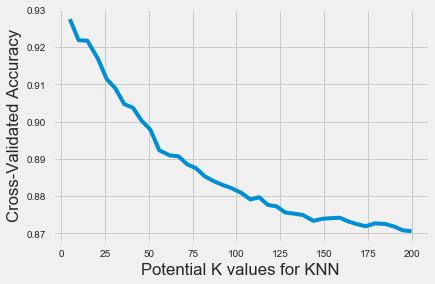

In [65]:

# plot the results (Manhattan distance)
plt.plot(k_potentials, grid_mean_scores)
plt.xlabel('Potential K values for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [66]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.927548492356
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


# SVM

In [73]:
# Train, fit and predict with SVM
Model=svm.SVC(kernel='linear')
Model.fit(X_train,y_train['quitter'])
Y_pred=Model.predict(X_test)

In [74]:
# Cross validation score for SVM
scores = cross_val_score(Model, X_train, y_train['quitter'], cv=10, scoring= 'accuracy')
print(scores.mean())
print
# Evaluate SVM for accuracy
print (metrics.accuracy_score(y_test['quitter'],Y_pred))
print
# Confusion matrix for SVM
confusion = metrics.confusion_matrix(y_test['quitter'], Y_pred)
print (confusion)

1.0

1.0

[[3692    0]
 [   0 4459]]


In [70]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
1.0
()
Misclassification Accuracy
0.0
()
Predicted Positive Accuracy
1.0
()
Predicted Negative Accuracy
1.0
()
Actual Positive Prediction Accuracy
1.0


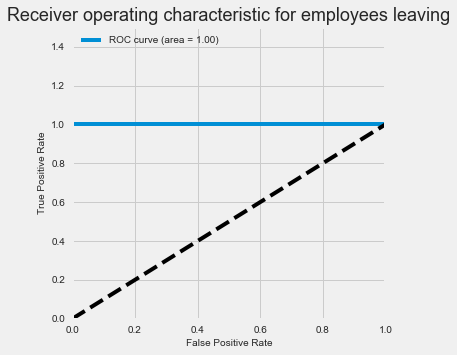

In [71]:
# Roc_curve for Support Vector Machine Model
FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test['quitter'], Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

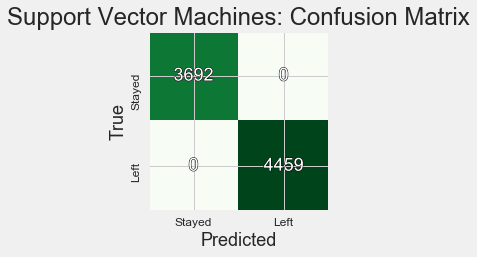

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)

plot_confusion_matrix(cm, title='Support Vector Machines: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

# Random Forest

Mean CV Accuracy for Model: 1.0 
()
Confusion Matrix for Model
[[3692    0]
 [   0 4459]]


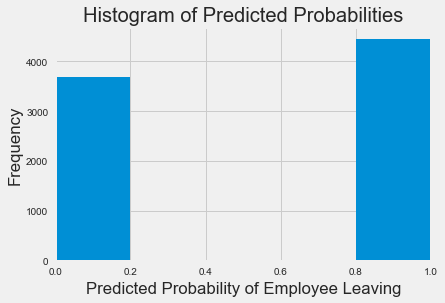

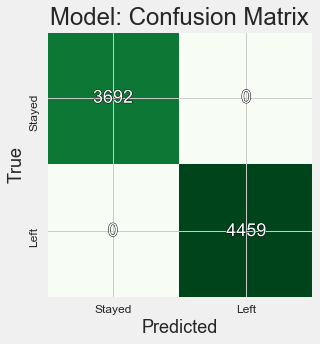

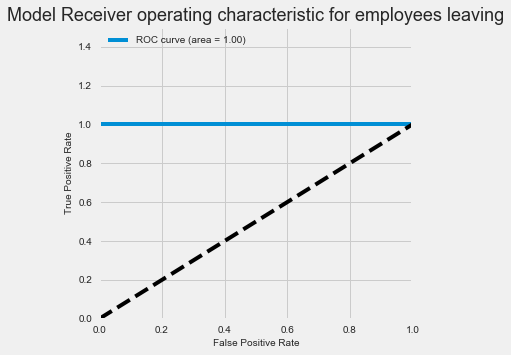

In [75]:
# Random Forests Classifier from Scikit Learn
RF = RandomForestClassifier(n_jobs=2)
model_stats(model = RF, X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

In [76]:
RF.fit(X_train,y_train['quitter'])
Y_pred=RF.predict(X_test)
# Score for 10-fold Cross Validation for Random Forests Classifier
scores = cross_val_score(RF, X_train, y_train['quitter'], cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for Random Forests

print(metrics.accuracy_score(y_test['quitter'], Y_pred))
# Confusion matrix for Random Forests

confusion = metrics.confusion_matrix(y_test['quitter'], Y_pred)
print (confusion)

1.0
1.0
[[3692    0]
 [   0 4459]]


In [77]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
1.0
()
Misclassification Accuracy
0.0
()
Predicted Positive Accuracy
1.0
()
Predicted Negative Accuracy
1.0
()
Actual Positive Prediction Accuracy
1.0


# Bagging 

In [78]:
# Bagging Classifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
Bagging = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

Mean CV Accuracy for Model: 1.0 
()
Confusion Matrix for Model
[[3692    0]
 [   0 4459]]


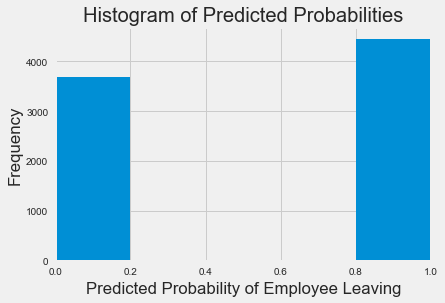

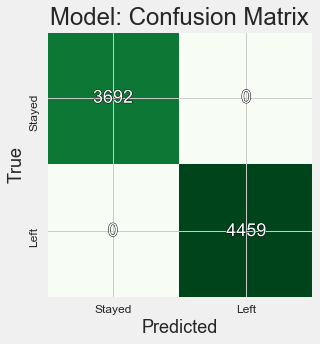

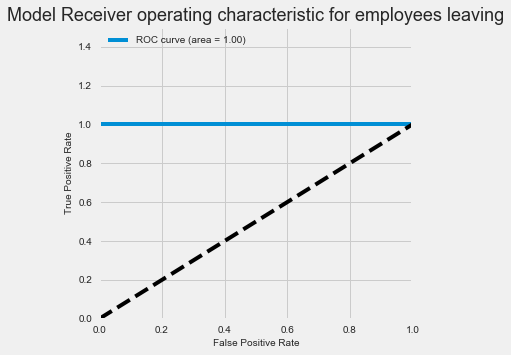

In [79]:
model_stats(model = Bagging, X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

In [81]:
Bagging.fit(X_train,y_train['quitter'])
Y_pred=Bagging.predict(X_test)
# Cross Validation for Bagging

scores = cross_val_score(Bagging, X_train, y_train['quitter'], cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for Bagging
print(metrics.accuracy_score(y_test['quitter'], Y_pred))
# Confusion matrix for Bagging

confusion = metrics.confusion_matrix(y_test['quitter'], Y_pred)
print (confusion)


1.0
1.0
[[3692    0]
 [   0 4459]]


In [82]:
# Classification Accuracy confirmation between manual calculation and formula for the clf

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
1.0
()
Misclassification Accuracy
0.0
()
Predicted Positive Accuracy
1.0
()
Predicted Negative Accuracy
1.0
()
Actual Positive Prediction Accuracy
1.0


# AdaBoost

In [83]:
# AdaBoost Classifier

seed = 7
cart = AdaBoostClassifier()
num_trees = 100
AdaBoostClassifier = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

Mean CV Accuracy for Model: 1.0 
()
Confusion Matrix for Model
[[3692    0]
 [   0 4459]]


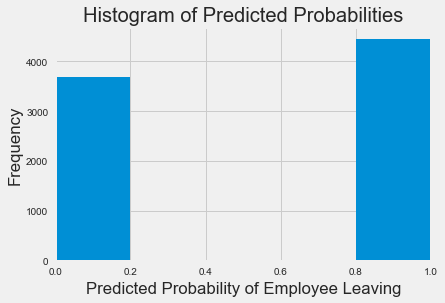

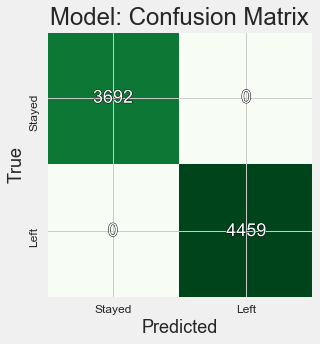

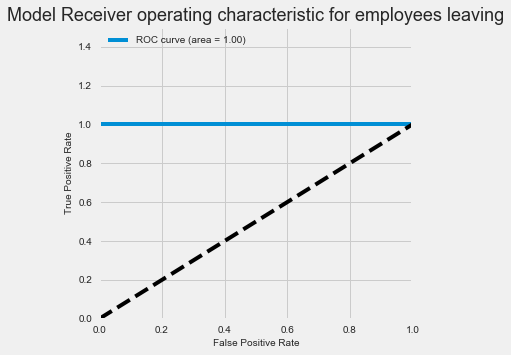

In [84]:
model_stats(model = AdaBoostClassifier, X_train = X_train, y_train = y_train['quitter'], y_test = y_test['quitter'], X_test = X_test)

In [86]:
AdaBoostClassifier.fit(X_train,y_train['quitter'])
Y_pred=AdaBoostClassifier.predict(X_test)

# Cross Validation for AdaBoost
scores = cross_val_score(AdaBoostClassifier, X_train, y_train['quitter'], cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for AdaBoost

from sklearn import metrics
print(metrics.accuracy_score(y_test['quitter'], Y_pred))
# Confusion matrix for AdaBoost

confusion = metrics.confusion_matrix(y_test['quitter'], Y_pred)
print (confusion)
# Classification Accuracy confirmation between manual calculation and formula for the clf

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

1.0
1.0
[[3692    0]
 [   0 4459]]
Classification Accuracy
1.0
()
Misclassification Accuracy
0.0
()
Predicted Positive Accuracy
1.0
()
Predicted Negative Accuracy
1.0
()
Actual Positive Prediction Accuracy
1.0


In [ ]:
# Gradient Boosting

### Let's get to work using LassoCV

In [234]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], selection='random', max_iter=15000).fit(X_train, y_train)
res = rmse_cv(model_lasso)
print("Mean:",res.mean())
print("Min: ",res.min())

('Mean:', 0.31522362269367787)
('Min: ', 0.31159504614798117)


In [235]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 9 variables


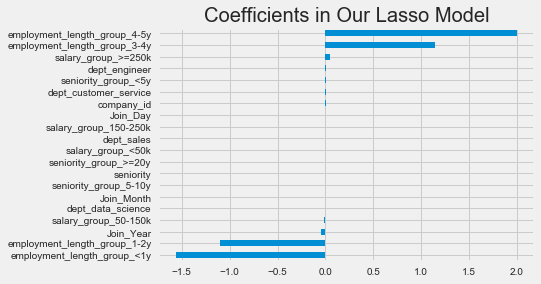

In [236]:
# plotting feature importances!
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in Our Lasso Model")

### To Do

Grid Search for Lasso, and add other algrithms for comparison to try and lower the rmse